In [38]:
%matplotlib widget
import spb
import sympy as sp
from sympy import sin, cos, pi, sqrt, acos
sp.init_printing()

In [39]:
# Helper functions

def homogeneous_transform(rotation: sp.Matrix = sp.eye(3), translation: sp.Matrix = sp.zeros(3, 1)) -> sp.Matrix:
    return rotation.row_join(translation).col_join(sp.Matrix([[0, 0, 0, 1]]))

def dh_to_transform(rotation, twist, displacement, offset):
    return sp.Matrix([
        [cos(rotation), -sin(rotation)*cos(twist), sin(rotation)*sin(twist), offset*cos(rotation)],
        [sin(rotation), cos(rotation)*cos(twist), -cos(rotation)*sin(twist), offset*sin(rotation)],
        [0, sin(twist), cos(twist), displacement],
        [0, 0, 0, 1]
    ])

In [40]:
# Problem setup

turret_yaw, elevator_travel, elbow_pitch, wrist_pitch, wrist_yaw = sp.symbols('theta_1 d_1_2 theta_3 theta_4 theta_5')

ARM_LENGTH_M = 0.5

# Define transforms for each joint
turret_transform = dh_to_transform(rotation=turret_yaw, twist=0, displacement=0, offset=0)
elevator_transform = dh_to_transform(rotation=0, twist=pi/2, displacement=elevator_travel, offset=0)
elbow_transform = dh_to_transform(rotation=elbow_pitch, twist=0, displacement=0, offset=ARM_LENGTH_M)
wrist_transform = dh_to_transform(rotation=wrist_pitch, twist=-pi/2, displacement=0, offset=0)
wrist_2_transform = dh_to_transform(rotation=wrist_yaw, twist=0, displacement=0, offset=0) 
# Define the base to end-effector transform
base_to_end = turret_transform * elevator_transform * elbow_transform * wrist_transform * wrist_2_transform

In [47]:
# Print latex for each transform & the base to end-effector transform
print(f"Turret:\n{sp.latex(turret_transform)}\n")
print(f"Elevator:\n{sp.latex(elevator_transform)}\n")
print(f"Elbow:\n{sp.latex(elbow_transform)}\n")
print(f"Wrist:\n{sp.latex(wrist_transform)}\n")
print(f"Wrist 2:\n{sp.latex(wrist_2_transform)}\n")
print(sp.latex(base_to_end))
display(turret_transform)
display(elevator_transform)
display(elbow_transform)
display(wrist_transform)
display(wrist_2_transform)
display(base_to_end)

Turret:
\left[\begin{matrix}\cos{\left(\theta_{1} \right)} & - \sin{\left(\theta_{1} \right)} & 0 & 0\\\sin{\left(\theta_{1} \right)} & \cos{\left(\theta_{1} \right)} & 0 & 0\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right]

Elevator:
\left[\begin{matrix}1 & 0 & 0 & 0\\0 & 0 & -1 & 0\\0 & 1 & 0 & d_{1 2}\\0 & 0 & 0 & 1\end{matrix}\right]

Elbow:
\left[\begin{matrix}\cos{\left(\theta_{3} \right)} & - \sin{\left(\theta_{3} \right)} & 0 & 0.5 \cos{\left(\theta_{3} \right)}\\\sin{\left(\theta_{3} \right)} & \cos{\left(\theta_{3} \right)} & 0 & 0.5 \sin{\left(\theta_{3} \right)}\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right]

Wrist:
\left[\begin{matrix}\cos{\left(\theta_{4} \right)} & 0 & - \sin{\left(\theta_{4} \right)} & 0\\\sin{\left(\theta_{4} \right)} & 0 & \cos{\left(\theta_{4} \right)} & 0\\0 & -1 & 0 & 0\\0 & 0 & 0 & 1\end{matrix}\right]

Wrist 2:
\left[\begin{matrix}\cos{\left(\theta_{5} \right)} & - \sin{\left(\theta_{5} \right)} & 0 & 0\\\sin{\left(\theta_{5} \right)} & \cos{\l

⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

⎡1  0  0    0  ⎤
⎢              ⎥
⎢0  0  -1   0  ⎥
⎢              ⎥
⎢0  1  0   d₁ ₂⎥
⎢              ⎥
⎣0  0  0    1  ⎦

⎡cos(θ₃)  -sin(θ₃)  0  0.5⋅cos(θ₃)⎤
⎢                                 ⎥
⎢sin(θ₃)  cos(θ₃)   0  0.5⋅sin(θ₃)⎥
⎢                                 ⎥
⎢   0        0      1       0     ⎥
⎢                                 ⎥
⎣   0        0      0       1     ⎦

⎡cos(θ₄)  0   -sin(θ₄)  0⎤
⎢                        ⎥
⎢sin(θ₄)  0   cos(θ₄)   0⎥
⎢                        ⎥
⎢   0     -1     0      0⎥
⎢                        ⎥
⎣   0     0      0      1⎦

⎡cos(θ₅)  -sin(θ₅)  0  0⎤
⎢                       ⎥
⎢sin(θ₅)  cos(θ₅)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

⎡(-sin(θ₃)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₃)⋅cos(θ₄))⋅cos(θ₅) - sin(θ₁)⋅sin(θ₅
⎢                                                                             
⎢(-sin(θ₁)⋅sin(θ₃)⋅sin(θ₄) + sin(θ₁)⋅cos(θ₃)⋅cos(θ₄))⋅cos(θ₅) + sin(θ₅)⋅cos(θ₁
⎢                                                                             
⎢                 (sin(θ₃)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₃))⋅cos(θ₅)                 
⎢                                                                             
⎣                                      0                                      

)  -(-sin(θ₃)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₃)⋅cos(θ₄))⋅sin(θ₅) - sin(θ₁)⋅cos
                                                                              
)  -(-sin(θ₁)⋅sin(θ₃)⋅sin(θ₄) + sin(θ₁)⋅cos(θ₃)⋅cos(θ₄))⋅sin(θ₅) + cos(θ₁)⋅cos
                                                                              
                    -(sin(θ₃)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₃))⋅sin(θ₅)              
                                                   

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦

⎡cos(θ₁)⋅cos(θ₃)  -sin(θ₃)⋅cos(θ₁)  sin(θ₁)   0.5⋅cos(θ₁)⋅cos(θ₃)⎤
⎢                                                                ⎥
⎢sin(θ₁)⋅cos(θ₃)  -sin(θ₁)⋅sin(θ₃)  -cos(θ₁)  0.5⋅sin(θ₁)⋅cos(θ₃)⎥
⎢                                                                ⎥
⎢    sin(θ₃)          cos(θ₃)          0      d₁ ₂ + 0.5⋅sin(θ₃) ⎥
⎢                                                                ⎥
⎣       0                0             0               1         ⎦

⎡  0.5⋅cos(θ₃)  ⎤
⎢               ⎥
⎢       0       ⎥
⎢               ⎥
⎢0.5⋅sin(θ₃) + 1⎥
⎢               ⎥
⎣       1       ⎦

/opt/homebrew/Caskroom/miniconda/base/envs/ece4704/lib/python3.8/site-packages/spb/backends/matplotlib.py:905: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self._ax.set_ylim(ylim)


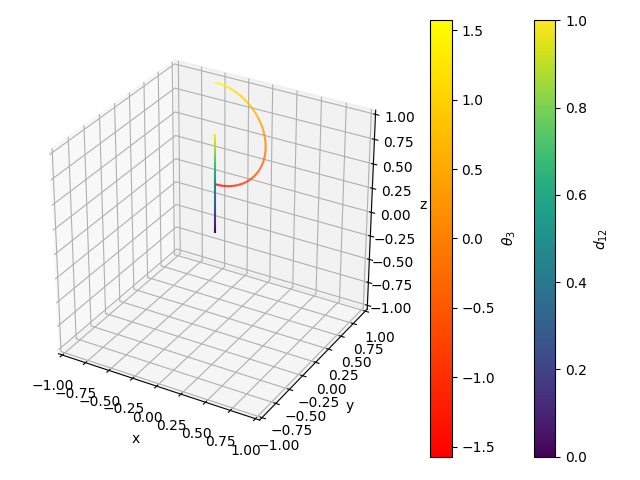

In [42]:
plot_params = dict(xlim=(-1, 1), ylim=(-1, 1), aspect_ratio=(1, 1))
plot3d_params = dict(xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1), aspect='equal', show=False)

# Plot position of end-effector as function of joint angles
end_effector_pos = sp.Matrix([0, 0, 0, 1])
turret_fwd = (turret_transform * elevator_transform * end_effector_pos ).subs({elevator_travel: 1})
elevator_fwd = (turret_transform * elevator_transform * end_effector_pos).subs({turret_yaw: 0})
elbow_fwd = (turret_transform * elevator_transform * elbow_transform * end_effector_pos).subs({turret_yaw: 0, elevator_travel: 1})
wrist_fwd = (turret_transform * elevator_transform * elbow_transform * wrist_transform * end_effector_pos).subs({turret_yaw: 0, elevator_travel: 1, elbow_pitch: 0})

display(end_effector_pos)
display(turret_transform * elevator_transform * elbow_transform )
display(elbow_fwd)

turret_plot = spb.plot3d_parametric_line(*turret_fwd[:3, 0], (turret_yaw, -pi/2, pi/2), **plot3d_params)
elevator_plot = spb.plot3d_parametric_line(*elevator_fwd[:3, 0], (elevator_travel, 0.0, 1.0), **plot3d_params)
elbow_plot = spb.plot3d_parametric_line(*elbow_fwd[:3, 0], (elbow_pitch, -pi/2, pi/2), **plot3d_params)
wrist_plot = spb.plot3d_parametric_line(*wrist_fwd[:3, 0], (wrist_pitch, -pi/2, pi/2), **plot3d_params)
# (turret_plot + elevator_plot + elbow_plot + wrist_plot).show()
# turret_plot.show()
# elbow_plot.show()
# wrist_plot.show()
(elevator_plot + elbow_plot).show()

In [43]:
# sp.Eq(sp.simplify(elbow_transform.inv() * elevator_transform.inv() * turret_transform.inv() * base_to_end), elbow_transform * wrist_transform)

⎡0.5⋅cos(θ₁)⋅cos(θ₃)⎤   ⎡x⎤
⎢                   ⎥   ⎢ ⎥
⎢0.5⋅sin(θ₁)⋅cos(θ₃)⎥   ⎢y⎥
⎢                   ⎥ = ⎢ ⎥
⎢d₁ ₂ + 0.5⋅sin(θ₃) ⎥   ⎢z⎥
⎢                   ⎥   ⎢ ⎥
⎣         1         ⎦   ⎣1⎦

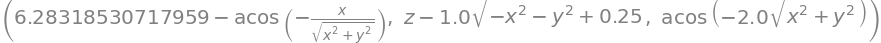

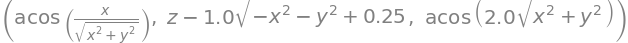

\left( 6.28318530717959 - \operatorname{acos}{\left(- \frac{x}{\sqrt{x^{2} + y^{2}}} \right)}, \  z - 1.0 \sqrt{- x^{2} - y^{2} + 0.25}, \  \operatorname{acos}{\left(- 2.0 \sqrt{x^{2} + y^{2}} \right)}\right)
\left( \operatorname{acos}{\left(\frac{x}{\sqrt{x^{2} + y^{2}}} \right)}, \  z - 1.0 \sqrt{- x^{2} - y^{2} + 0.25}, \  \operatorname{acos}{\left(2.0 \sqrt{x^{2} + y^{2}} \right)}\right)


In [44]:
x, y, z = sp.symbols('x y z')
point = sp.Matrix([x, y, z, 1])
tf = turret_transform * elevator_transform * elbow_transform
eq = sp.Eq(tf*sp.Matrix([0, 0, 0, 1]), point)
display(eq)
sol_a, sol_b = sp.solve(eq, turret_yaw, elevator_travel, elbow_pitch)
display(sol_a)
display(sol_b)
print(sp.latex(sol_a))
print(sp.latex(sol_b))


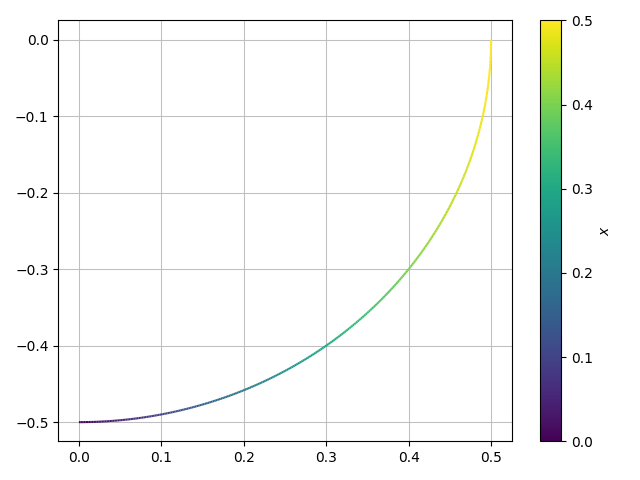

In [45]:
elevator_travel_sol = (z - sqrt(-x**2-y**2+0.25)).subs({y: 0, z: 0})
elev_ik_plot = spb.plot_parametric(x, elevator_travel_sol, (x, 0, 0.5))

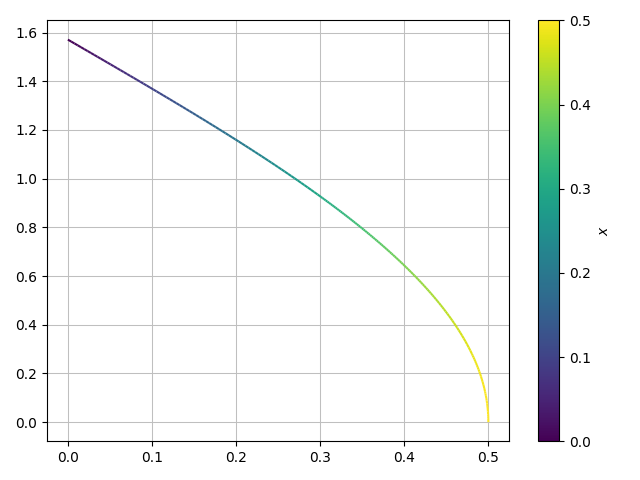

In [46]:
elbow_pitch_sol = (acos(2*sqrt(x**2+y**2))).subs({y: 0})
elbow_ik_plot = spb.plot_parametric(x, elbow_pitch_sol, (x, 0, 0.5))